In [70]:
import pandas as pd
import numpy as np
import seaborn as sb

In [66]:
df = pd.read_csv('ExtractedData.csv')

In [67]:
df

,Unnamed: 0,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,Ips-Panel,PPI,Processor,HDD,SSD,Hybrid,Flash_Storage,Price
0,0,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,71378.6832
1,1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,47895.5232
2,2,HP,Notebook,8,Intel,"Other:Chrome,Linux,Android,NoOS",1.86,0,0,141.211998,Intel Core i5,0,256,0,0,30636.0000
3,3,Apple,Ultrabook,16,AMD,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,135195.3360
4,4,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,1,1,157.350512,Intel Core i7,0,128,0,0,33992.6400
1298,1299,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,1,1,276.053530,Intel Core i7,0,512,0,0,79866.7200
1299,1300,Lenovo,Notebook,2,Intel,Windows,1.50,0,0,111.935204,Intel Other,0,0,0,64,12201.1200
1300,1301,HP,Notebook,6,AMD,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0,0,0,40705.9200


In [35]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [69]:
df.corr().Price

C:\Users\miste\AppData\Local\Temp\ipykernel_10796\3892903510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Price


Unnamed: 0       0.068784
Ram              0.742905
Weight           0.209867
TouchScreen      0.192917
Ips-Panel        0.253320
PPI              0.475368
HDD             -0.096891
SSD              0.670660
Hybrid           0.007942
Flash_Storage   -0.040067
Price            1.000000
Name: Price, dtype: float64

In [45]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [75]:
X = df.drop(columns=['Price'])
Y = np.log(df.Price)

C:\Users\miste\AppData\Local\Temp\ipykernel_10796\3409877042.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(Y)


<Axes: xlabel='Price', ylabel='Density'>

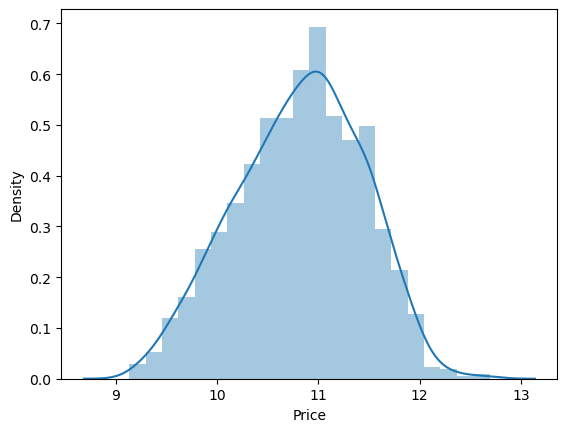

In [76]:
sb.distplot(Y)

In [77]:
np.exp(12.5)

268337.2865208745

In [47]:
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,Ips-Panel,PPI,Processor,HDD,SSD
0,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel,"Other:Chrome,Linux,Android,NoOS",1.86,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD,Mac,1.83,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,256
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,Intel,Windows,1.80,1,1,157.350512,Intel Core i7,0,128
1298,Lenovo,2 in 1 Convertible,16,Intel,Windows,1.30,1,1,276.053530,Intel Core i7,0,512
1299,Lenovo,Notebook,2,Intel,Windows,1.50,0,0,111.935204,Intel Other,0,0
1300,HP,Notebook,6,AMD,Windows,2.19,0,0,100.454670,Intel Core i7,1000,0


In [64]:
np.exp(Y.max())

324954.7199999999

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state = 100)

In [41]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Linear Regression

In [53]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
                                       ],remainder='passthrough')
step2 = LinearRegression()

pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print("R2 Score ", r2_score(y_pred,Y_test))

R2 Score  0.7906610803172207


C:\Users\miste\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
X.head(2)

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,Ips-Panel,PPI,Processor,HDD,SSD
0,Apple,Ultrabook,8,Intel,Mac,1.37,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel,Mac,1.34,0,0,127.677940,Intel Core i5,0,0


# K-Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsRegressor

In [56]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
                                       ],remainder='passthrough')
step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print("R2 Score ", r2_score(y_pred,Y_test))

C:\Users\miste\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score  0.7928812218437755


# Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
step1 = ColumnTransformer(transformers=[('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,4,9])
                                       ],remainder='passthrough')
step2 = RandomForestRegressor(n_estimators=100,random_state=5,max_samples=0.6,max_features=0.8,max_depth=25)

pipe = Pipeline([('step1',step1),('step2',step2)])
pipe.fit(X_train,Y_train)

y_pred = pipe.predict(X_test)
print("R2 Score ", r2_score(y_pred,Y_test))

C:\Users\miste\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 Score  0.8705184865495734


# Random Forest is the most accurate and successfull model in our case

In [61]:
import pickle

pickle.dump(df,open('dataset.pkl','wb'))


In [62]:
pickle.dump(pipe,open('model_pipe.pkl','wb'))